I0
[2.80056659]
[0.13381993]
bfit
[0.00014431]
[8.16314895e-06]


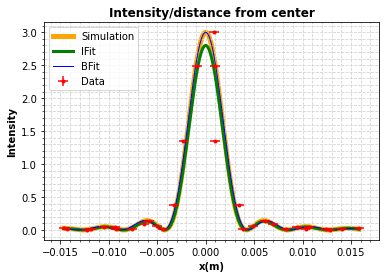

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

lung_onda = 632.8e-09
L = 1
b = 150e-06
Intens = 3


xdata = np.array([])
xdataerr = 0.0005
Idata = np.array([])
Idataerr = 0.0005

#simulation
def intensityFunction(x):
  return (Intens*((np.sin(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))/(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))**2)

xdata = np.linspace(-0.015,0.015,31)
for i in range(len(xdata)):
  if(xdata[i] == 0):
    xdata[i] = 0.000001
Idata = intensityFunction(xdata)

xdata = xdata - np.random.normal(0,xdataerr,len(xdata))
Idata = Idata - np.random.normal(0,Idataerr,len(Idata))

#fitting Intensity
def intensityFunctionFit(x,I0):
  return (I0*((np.sin(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))/(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))**2)
guess = np.array([Intens])
popt, pcov = scipy.optimize.curve_fit(intensityFunctionFit, xdata, Idata,sigma=np.ones(len(Idata))*Idataerr, p0 = guess)

I0err = np.sqrt(np.diag(pcov))
I0 = popt
print("I0")

print(I0)
print(I0err)

xfit = np.linspace(min(xdata), max(xdata), 1000)
yfit = intensityFunctionFit(xfit,I0)

#fitting distance from measured intensity
def distanceFunctionFit(x,b):
  return (Intens*((np.sin(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))/(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))**2)
guess = np.array([b])
popt, pcov = scipy.optimize.curve_fit(distanceFunctionFit, xdata, Idata,sigma=np.ones(len(Idata))*Idataerr, p0 = guess)

bfiterr = np.sqrt(np.diag(pcov))
bfit = popt
print("bfit")

print(bfit)
print(bfiterr)

xfitb = np.linspace(min(xdata), max(xdata), 1000)
yfitb = distanceFunctionFit(xfit,bfit)




x = np.linspace(min(xdata),max(xdata),1000)
y = intensityFunction(x)

#graph

fig = plt.figure()
ax = fig.gca()
plt.title("Intensity/distance from center",fontweight="bold")
plt.xlabel("x(m)",fontweight="bold")
plt.ylabel("Intensity",fontweight="bold")

plt.grid(color='lightgray',linestyle="--",zorder=0)

plt.errorbar(xdata,Idata, xerr = xdataerr, yerr=Idataerr,label="Data", color = "red", fmt='o', markersize=3, zorder=4)
plt.plot(x,y, label="Simulation", color="orange", linewidth=5, zorder=1)
plt.plot(xfit,yfit, label="IFit", color="green", linewidth=3, zorder=2)
plt.plot(xfitb,yfitb, label="BFit", color="blue", linewidth=1, zorder=3)
plt.legend(loc="upper left")
plt.minorticks_on()
plt.grid(True,"minor",linestyle="--",color='lightgray')
plt.show()